# <center> Parcial 1
### <center> Manuel Francisco Martinez Motta
### <center> Manuela Isabella Nobile Russi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
#Ecuación diferencial.
def f(x,y):
    return x+(2*y)

In [3]:
#distcretización temporal.
t = np.linspace(0.,4.,100)
x0 = 0.02

In [4]:
#Solución dada por odeint.
sol = odeint(f,x0,t)

#### Aplicación metodo adaptativo

In [6]:
def Increment(f,x,t,h):
    
    k1 = f(x,t)
    k2 = f(x+0.5*h*k1,t+0.5*h)
    k3 = f(x+0.5*h*k2,t+0.5*h)
    k4 = f(x+h*k3, t+h)
    
    Deltaf = h*(k1+2*k2+2*k3+k4)/6
    
    return x+Deltaf

In [7]:
def CheckStep(Delta1,Delta2,Delta3,h,minimo=1e-2,maximo=1e-1):
    
    tolerancia = 0.001
    
    Delta1 = np.abs(Delta1)
    Delta2 = np.abs(Delta2)
    Delta3 = np.abs(Delta3)
    
    if Delta1 < tolerancia:
        h = minimo
        dx = Delta1
        
    else:
        
        if np.abs((Delta1 - Delta2))/Delta1 > maximo:
            h = 0.5*h
            dx = Delta2
        
        elif np.abs((Delta1-Delta3))/Delta1 < minimo:
            h = 2*h
            dx = Delta3
        
        else:
            dx = Delta1
            
    return dx,h

In [8]:
def Adaptativo(f,x0,t):
    
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    
    x = x0
    
    Time = np.array([t])
    Vector = np.array([x])
    Steps = np.array([h])
    
    while t < tf:
        
        Delta1 = Increment(f,x,t,h)
        Delta2 = Increment(f,x,t,0.5*h)
        Delta3 = Increment(f,x,t,2*h)
    
        dx,h = CheckStep(Delta1,Delta2,Delta3,h)
        
        x = Increment(f,x,t,h)
        t += h
        
        Steps = np.append(Steps,h )
        Time = np.append(Time,t)
        Vector = np.append(Vector,x)
        
    return Time,Vector,Steps

In [32]:
#Solución exacta
def sol_exac(x):
    return (-x/2 - (1 - np.exp(2*x)))/4

sol_exac = sol_exac(t)

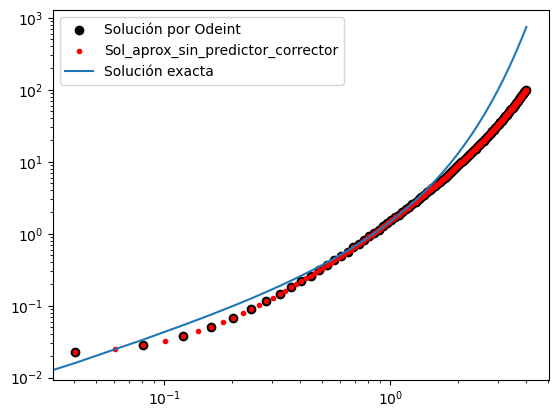

In [36]:
#Aproximación sin predictor y corrector
plt.scatter(t,sol[:,0],marker='o',color='k', label ='Solución por Odeint')
plt.scatter(t1,x1,marker='.',color='r', label ='Sol_aprox_sin_predictor_corrector')
plt.plot(t,sol_exac, label ='Solución exacta')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [37]:
def coeficientes(f, x0, t):
    # Coeficientes del predictor y el corrector
    c_cor= [475/1440, 1427/1440, -798/1440, 482/1440, -173/1440, 27/1440]
    c_pre = [1901/720, -2774/720, 2616/720, -1274/720, 251/720]
    
    #Llamo metodo adaptativo.
    x, y, h1 = Adaptativo(f, x0, t)
    
    #Aplicación de coeficientes.
    n = len(x)
    for i in range(4, n - 1):
        h = x[i + 1] - x[i]
        pre = sum(c_pre[j] * f(x[i - j], y[i - j]) for j in range(5))
        y[i + 1] = y[i] + h * sum(c_cor[j] * f(x[i - j], y[i - j]) for j in range(6))

    return x, y

In [38]:
x2,y2 = coeficientes(f,x0,t)

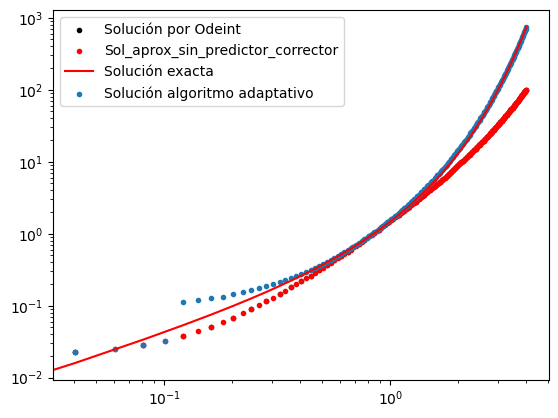

In [39]:
plt.scatter(t,sol[:,0],marker='.',color='k', label ='Solución por Odeint')
plt.scatter(t1,x1,marker='.',color='r', label ='Sol_aprox_sin_predictor_corrector')
plt.plot(t,sol_exac, 'r', label ='Solución exacta')
plt.scatter(x2,y2, marker='.', label = 'Solución algoritmo adaptativo')
plt.xscale('log')
plt.yscale('log')
plt.legend()